In [1]:
import numpy as np
import scipy.interpolate as spi
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate as pn

### Problem 1

###### Below is a set of nodes, $x$, and the values from an unknown function, call these values, $y$. Use inverse interpolation to estimate the zero of the function.

0 of the dataset occurs at y equals 3.29775


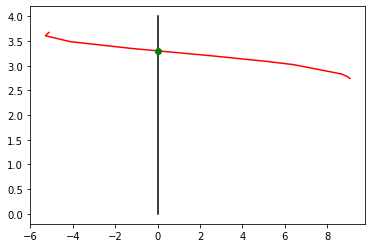

In [2]:
x = np.array([ 2.74224278,  2.77471006,  2.83172119,  3.01970318,  3.0856498 ,
        3.19755706,  3.25589028,  3.34826265,  3.48597765,  3.60503723,
        3.67263538])
y = np.array([ 9.06075145,  8.96495872,  8.67118032,  6.41863856,  5.15882069,
        2.58499501,  1.11050265, -1.2256528 , -4.12112752, -5.29465473,
       -5.12927659])
z = pn(y,x,0)
plt.plot(y,x,'r',[0,0],[0,4],'k',0,z,'go');
print ('0 of the dataset occurs at y equals {:2.5f}'.format(z))

### Problem 2

###### Below is a set of nodes, $x$, and the values of two unknown functions, $f$ and $g$, at these corresponding grid points. Find an estimate for the point of intersection of the graphs of these two functions. Note that you need to the find BOTH the $x$ and $y$ values for the point!

In [3]:
x = np.array([0.15839511,0.2247862,0.57336078,0.90902066,1.60394509,1.80681731,2.06397836,2.43692578])
f = np.array([0.9752231,0.95072651,0.71982829,0.43765753,0.07633377,0.03821265,0.01412221,0.0026357 ])
g = np.array([1.08193102,1.06379173,0.8770369,0.59224085,-0.01563539,-0.13283609,-0.21963379,-0.22527554])

###### Hint 1: Define an auxiliary function, $s(x) = f(x) - g(x)$, and find the zero of $s$ using inverse interpolation as you did in problem 1. See Hint 2 for a caveat to this hint.

###### Hint 2: If you follow Hint 1 exactly as written, you may not find the zero. The curvature in the graph may cause problems. You may need to trim the arrays for $x$, $f$, and $g$ in order to eliminate the intervals where the graphs are concave up or down. Fortunately, Python (and FORTRAN and MATLAB and Octave) use an indexing concept called 'slicing,' where a colon (:) allows you to access parts of an array without having to enter each index or use a loop. Below are some examples of slicing so you can catch on to the concept.

In [4]:
# Trim off the first and last elements of an array
#xx = x[1:-1]
#print(x)
#print(xx)

In [5]:
# Trim off the first element of the array but keep the rest
#ff = f[1:]
#print(f)
#print(ff)

In [6]:
# Trim off the last element of the array but keep the rest
#gg = g[:-1]
#print(g)
#print(gg)

In [7]:
# Trim off the first three elements and the last three elements of the array
gg = g[3:-3]
ff = f[3:-3]
xx = x[3:-3]
s = (ff-gg)
s2 = (gg-ff)
print(s)

[-0.15458332  0.09196916]


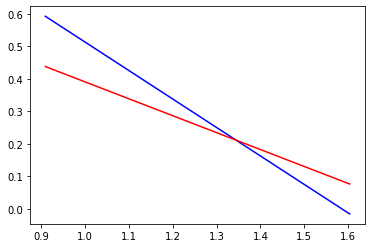

In [8]:
#Original graph using sliced intervals
plt.plot(xx,gg,'b-',xx,ff,'r-')

0 of the dataset occurs at x equals 1.34472


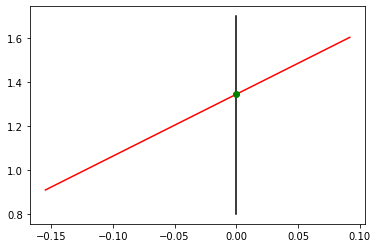

In [9]:
#THIS CELL SIGNIFIES THE X VALUE BY WHICH THE TWO FUNCTIONS INTERSECT (This is otherwise known as x*)
z=pn(s,xx,0)
plt.plot(s,xx,'r',[0,0],[.8,1.7],'k',z,'go')
print ('0 of the dataset occurs at x equals {:2.5f}'.format(z)) 
#This '0' is technically represented on the Y axis, this is because on the previous graph that would be the X axis.

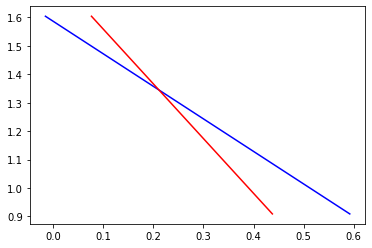

In [10]:
#This was used as a perspective graph for getting an idea of how inverting the original graph affected things
plt.plot(gg,xx,'b-',ff,xx,'r-')

In [11]:
#THIS CELL SIGNIFIES THE Y VALUE BY WHICH THE TWO FUNCTIONS INTERSECT (This is otherwise known as y*)
z=pn(xx,ff,1.34472)
print ('0 of the dataset occurs at y equals {:2.5f}'.format(z)) 

0 of the dataset occurs at y equals 0.21112


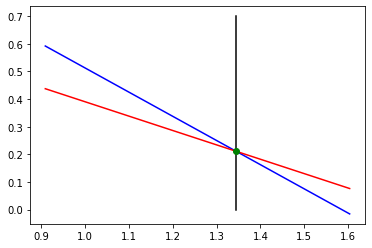

In [12]:
#Original graph now with interpolated x,y value shown as a green dot with a vertical line cutting through
plt.plot(xx,gg,'b-',xx,ff,'r-',[1.34472,1.34472],[0,.7],'k',1.34472,0.21112,'go')

In [13]:
#Number 5
def cheb(n):
    k = np.arange(n+1)
    return np.cos((2*k+1)*np.pi/(2*n+2))

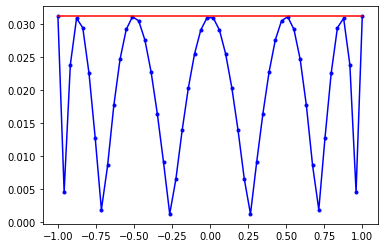

In [14]:
# Error and the cardinal function note
n = 5 #Number of "valleys" in the plot
L = 1/2**n
p = []
#xk = np.linspace(-1,1,n)
xk = cheb(n)
for x in np.linspace(-1,1):
    p.append(np.prod(np.fabs(x-xk)))
plt.plot(np.linspace(-1,1),p,'b.-',[-1,1],[L,L],'r-') #What does the error term look like when you control it
#(How bad can it get?)
#This seems to be relevant as it shows the error bounding by the number of "valleys" required to maintain that 
#level of accuracy (The number of valleys increases as n increases thus the more nodes the better error bounding)
#Graph shows maximum and minimum errors over the given interval